EE 679 Assignment 1B

Ankit Bhakar 

Roll No.: 22M1077


Overview:
We perform DFT analysis for different window lengths and types namely rectangular and hamming for the vowels /u/ for fundamental frequencies 120Hz and 220Hz<br>
Used 1024 sized DFT on zero padded signal.<br>
The window start point is placed at 0.2s so as to take the DFT on segment close to center of the speech signal
plotted magnitude spectra for all cases

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import IPython
from scipy.io.wavfile import read


%matplotlib inline
%matplotlib notebook

In [2]:
[Sr, u120] = read('u_F0-120_F1-300F2-870F3-2240_B1-50B2B3-100_Fs16k.wav')
[Sr, u220] = read('u_F0-220_F1-300F2-870F3-2240_B1-50B2B3-100_Fs16k.wav')
print("Sampling rate is {}".format(Sr))

Sampling rate is 16000


In [3]:
print("Vowel /u/ - F0=120, F1=300, F2=870, F3=2240")
display(IPython.display.Audio(u120, rate=Sr))
print()
print("Vowel /u/ - F0=220, F1=300, F2=870, F3=2240")
display(IPython.display.Audio(u220, rate=Sr))

Vowel /u/ - F0=120, F1=300, F2=870, F3=2240



Vowel /u/ - F0=220, F1=300, F2=870, F3=2240


In [4]:
print(u120.shape)
print(u220.shape)
print(type(u120))

(8001,)
(8001,)
<class 'numpy.ndarray'>


In [5]:
def DFT(vwl,  F0, window_s, window_type='rectangular', Fs=16000):
  dft_s = 1024
  w = int(np.floor(window_s*Fs))
  
  if window_type=='hamming':
    window = signal.windows.hamming(w)
  else:
    window = signal.windows.boxcar(w)   #default window is rectangular
  
  offset = int(0.2*Fs)      # offset of 0.2s -- we put the window near the center of the vowel signal for analysis

  out = vwl[offset:(offset+w)] * window
  out = np.pad(out, (0, dft_s-len(out)))
  
  dft = np.fft.fft(out, n=dft_s)
  freq = np.fft.fftfreq(dft.shape[-1], 1/Fs)
  
  dft = np.fft.fftshift(dft)
  freq = np.fft.fftshift(freq)
  fig = plt.figure(figsize=(13,7))
  plt.title("DFT plot using {} window of {}ms interval and $F_0$ = {}Hz".format(window_type, window_s*1000, F0))
  ax = plt.gca()
  ax.plot(freq, 20*np.log10(np.abs(dft)))
  ax.set_ylabel('Amplitude (dB)')
  ax.set_xlabel('Frequency (Hz)')
  ax.axis('tight')
  plt.show()
  line = ax.lines[0]
  line.get_xydata()


<IPython.core.display.Javascript object>


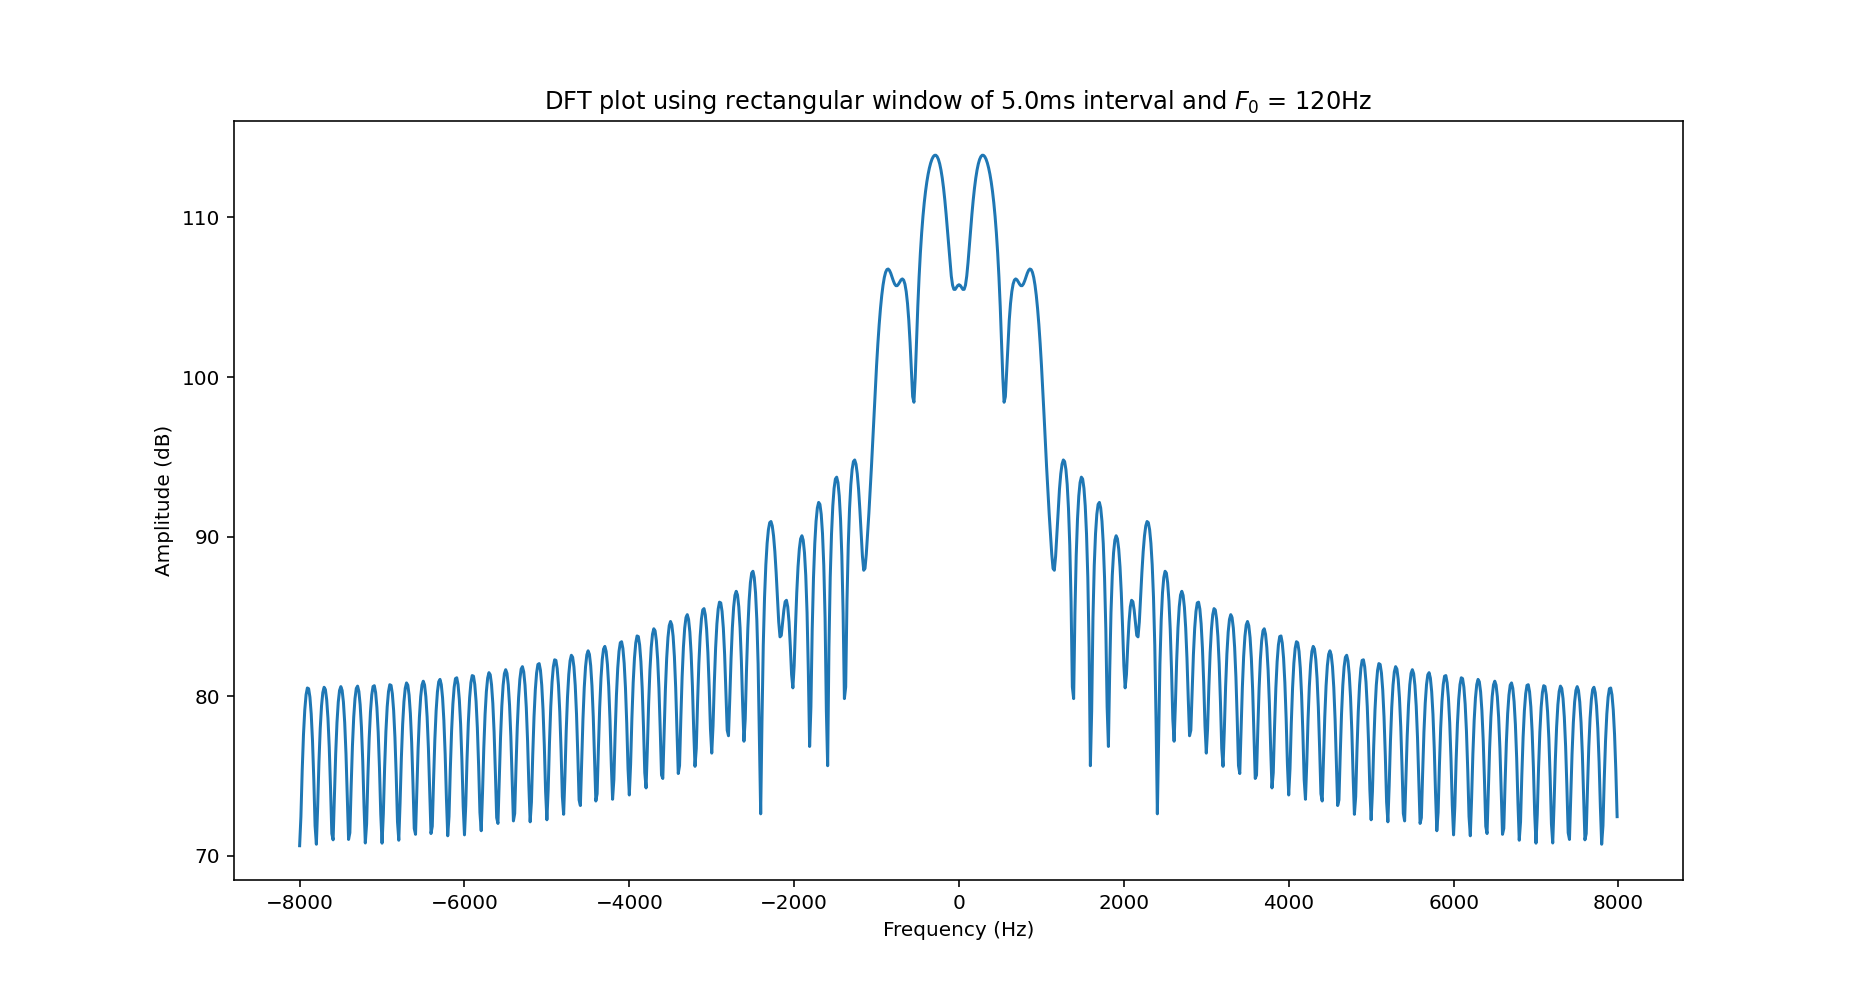

<IPython.core.display.Javascript object>


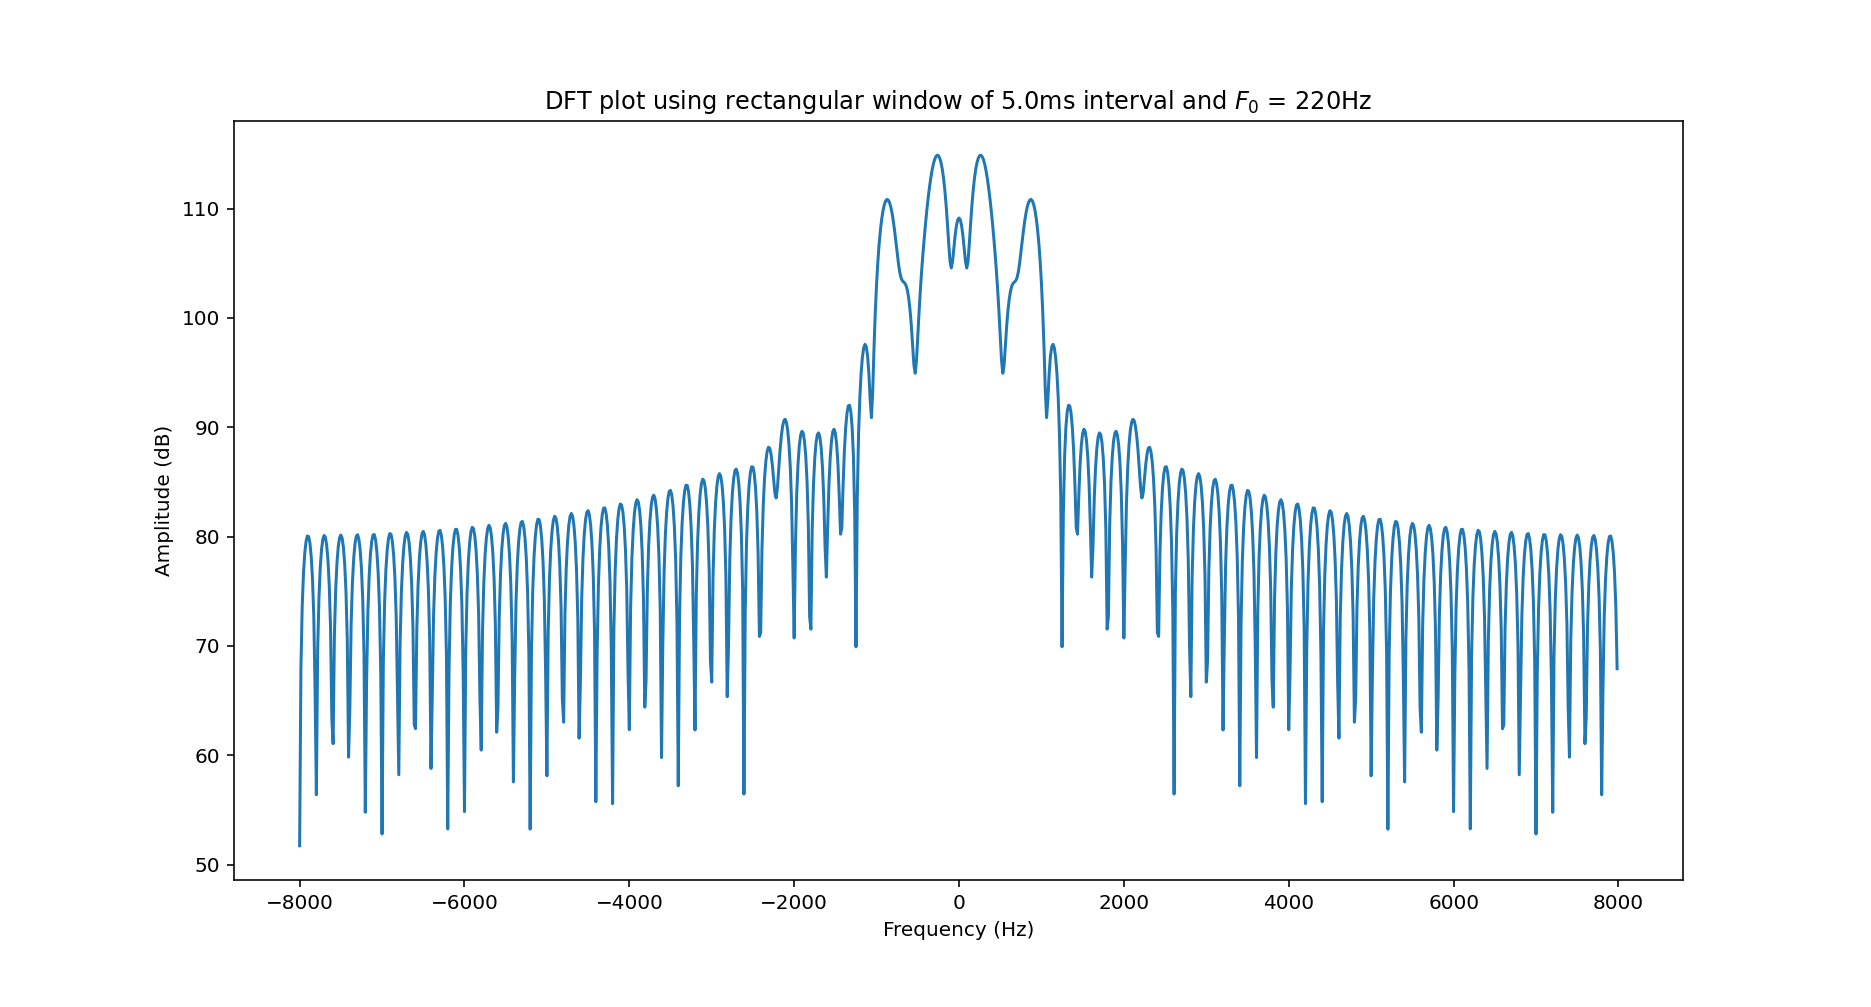

<IPython.core.display.Javascript object>


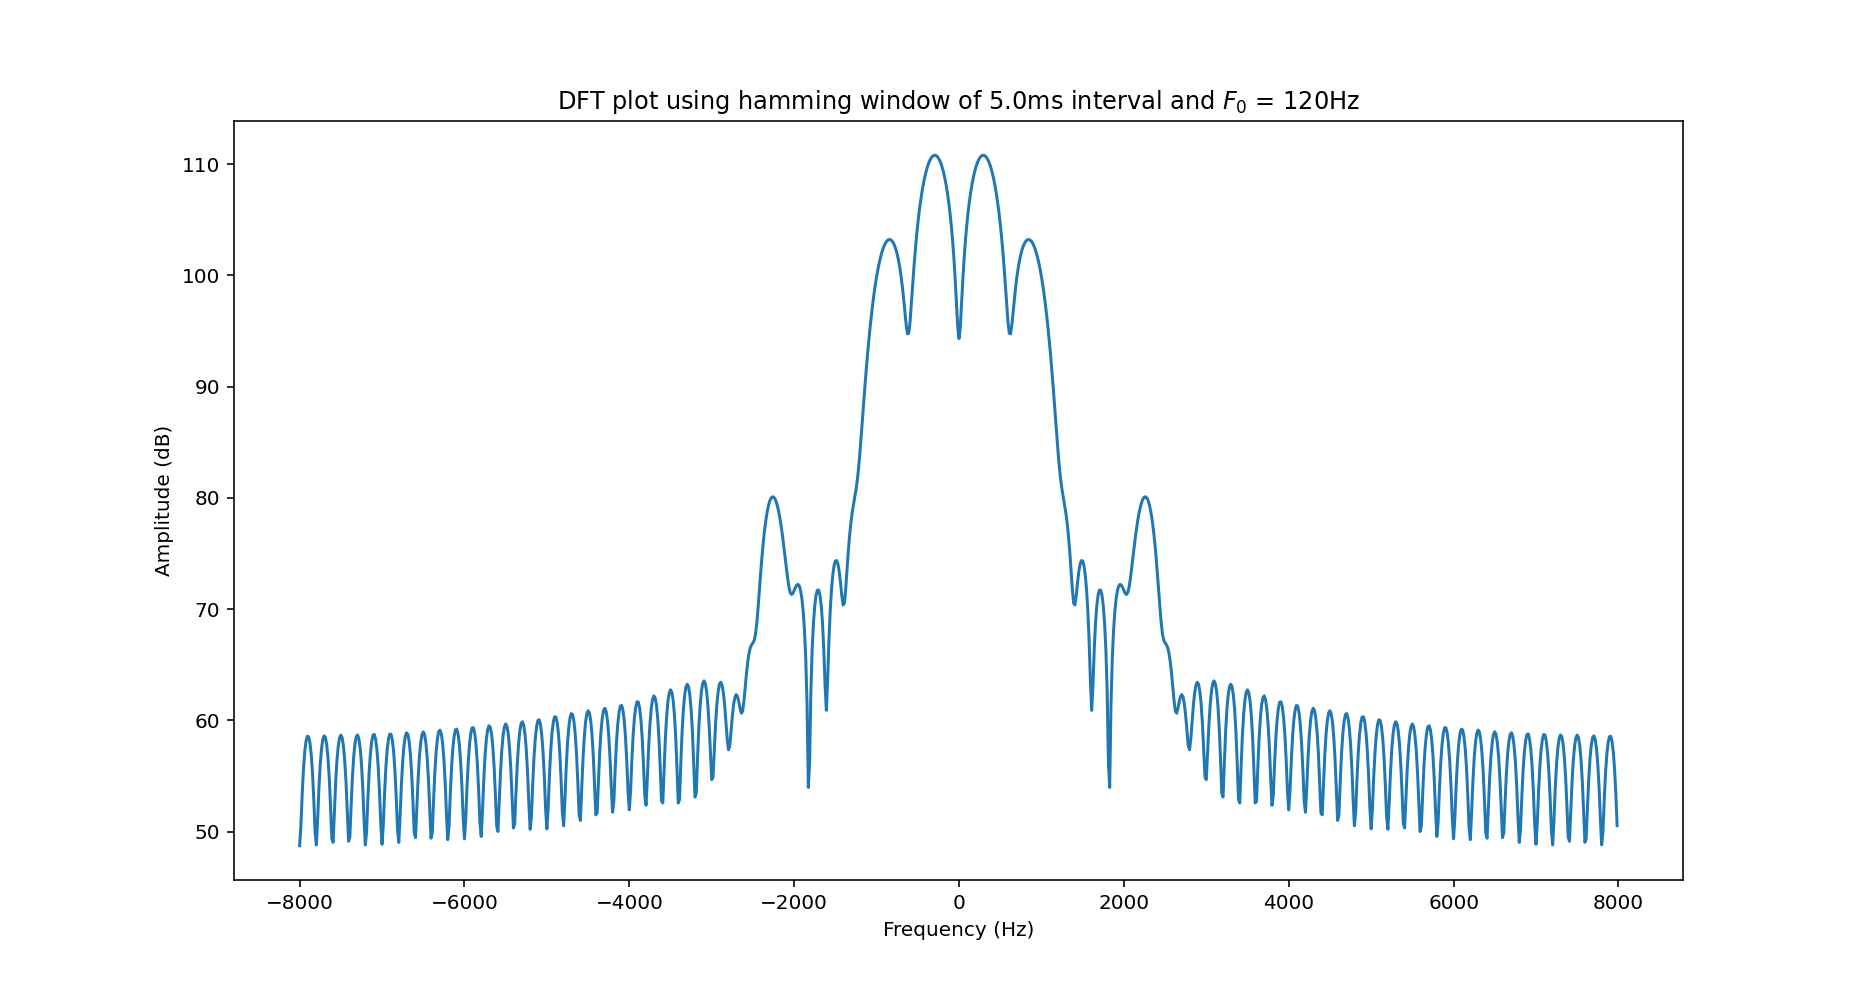

<IPython.core.display.Javascript object>


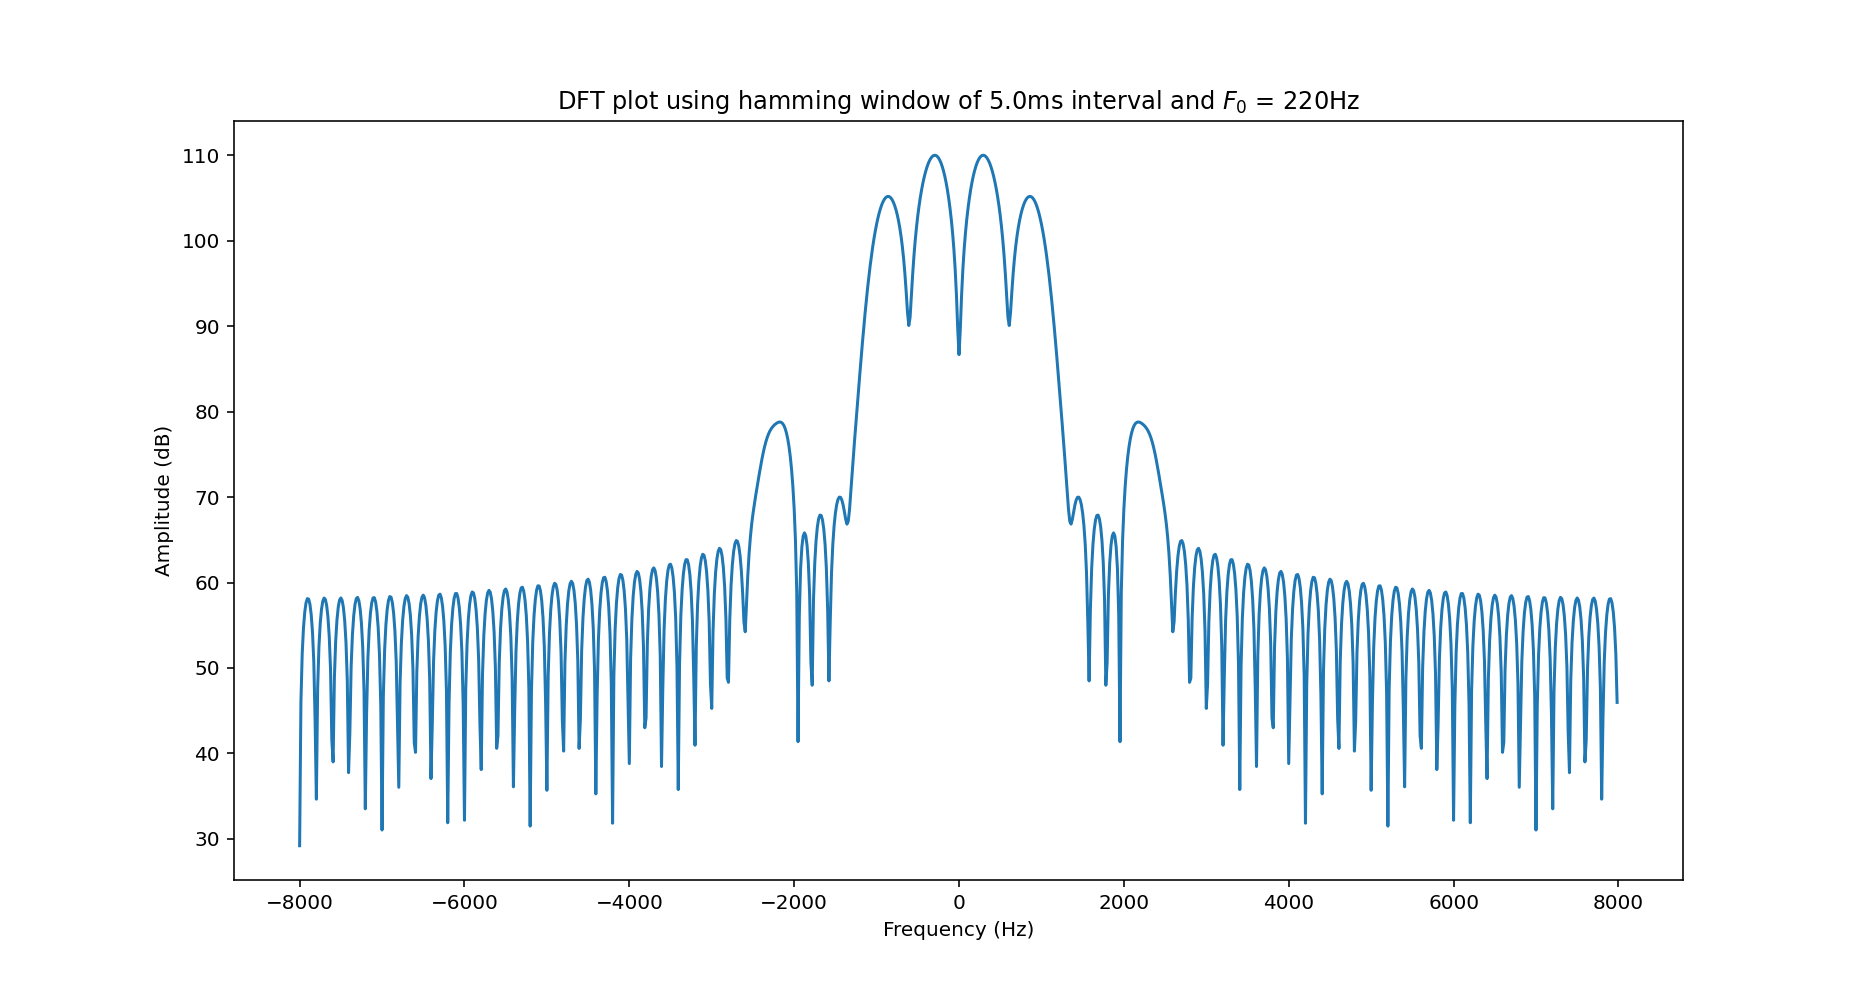

<IPython.core.display.Javascript object>


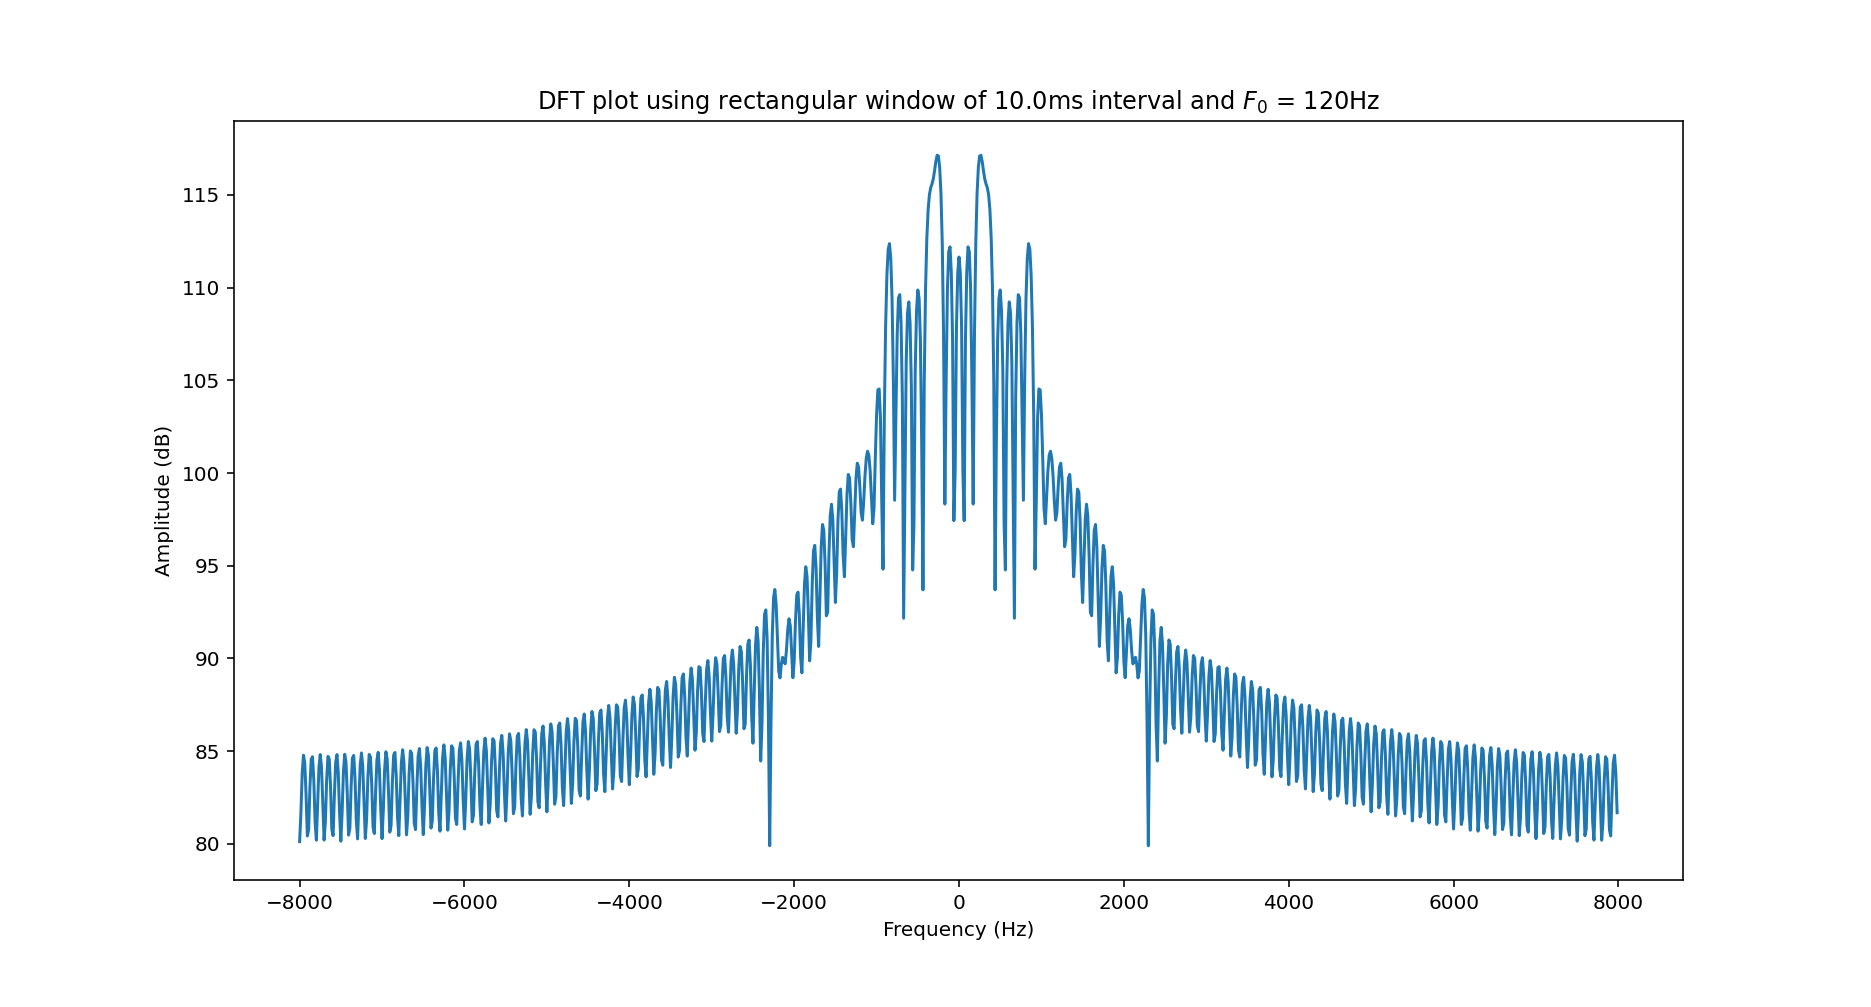

<IPython.core.display.Javascript object>


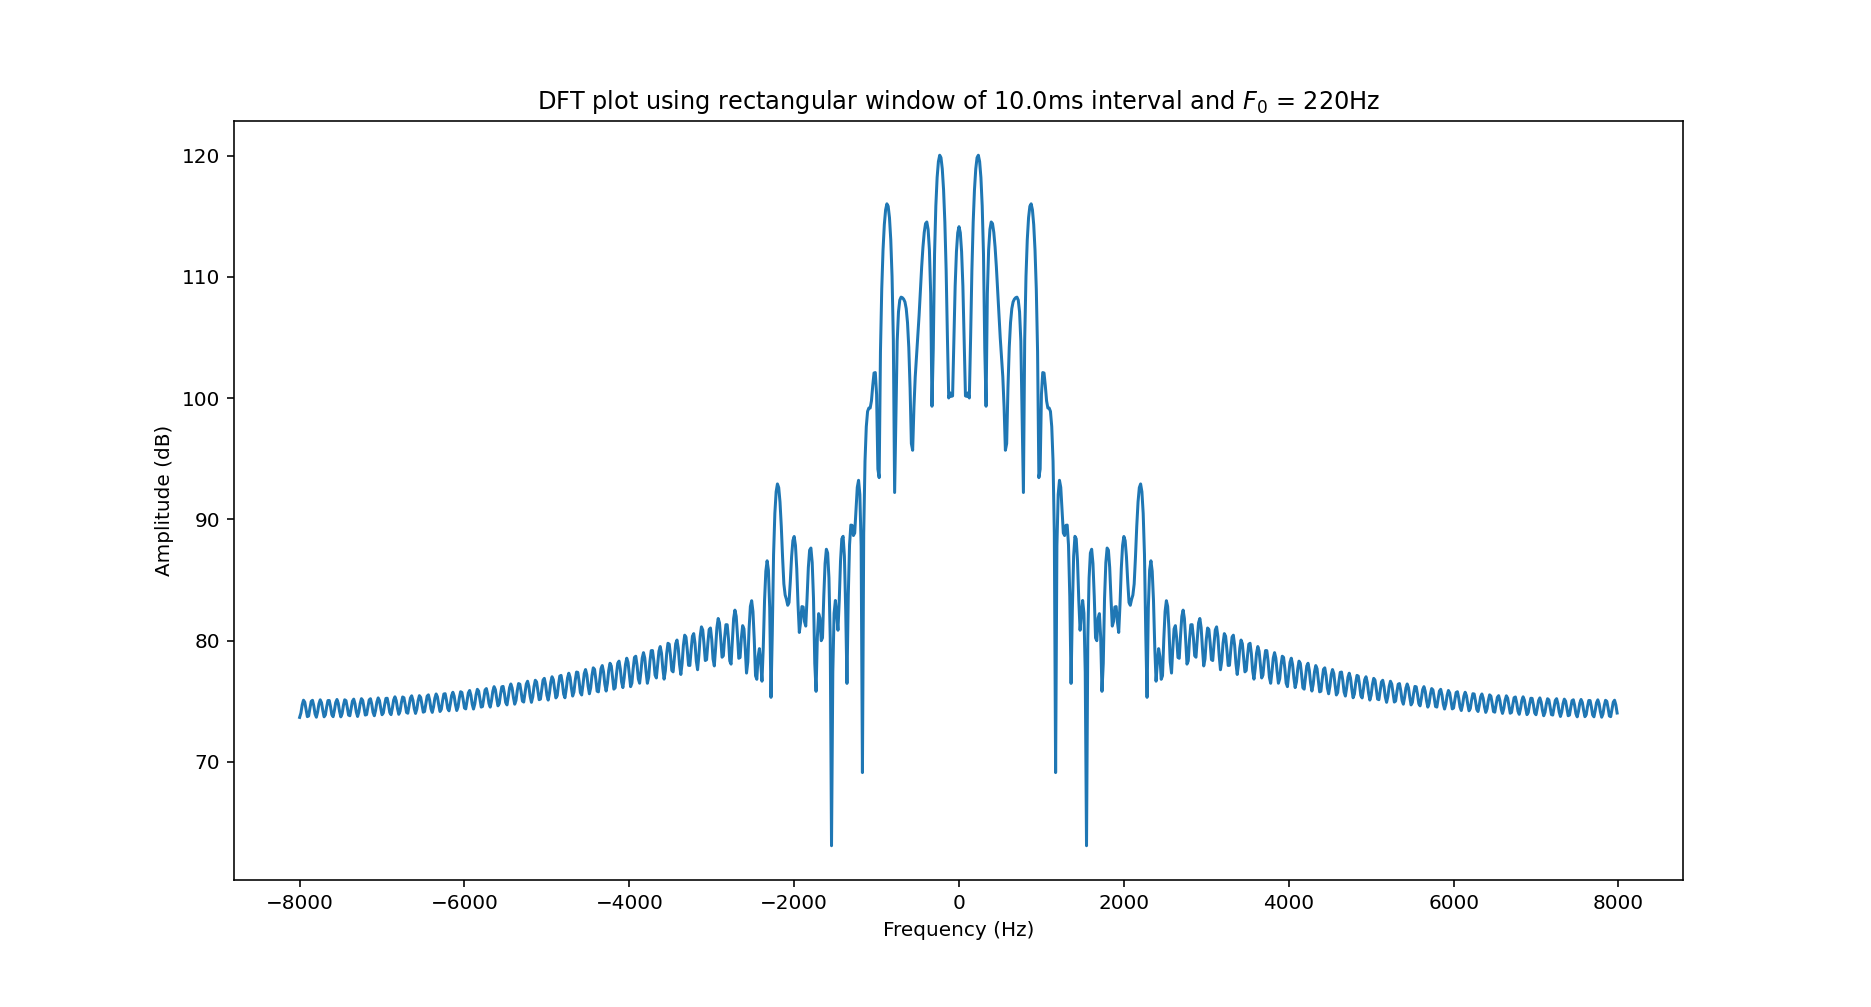

<IPython.core.display.Javascript object>


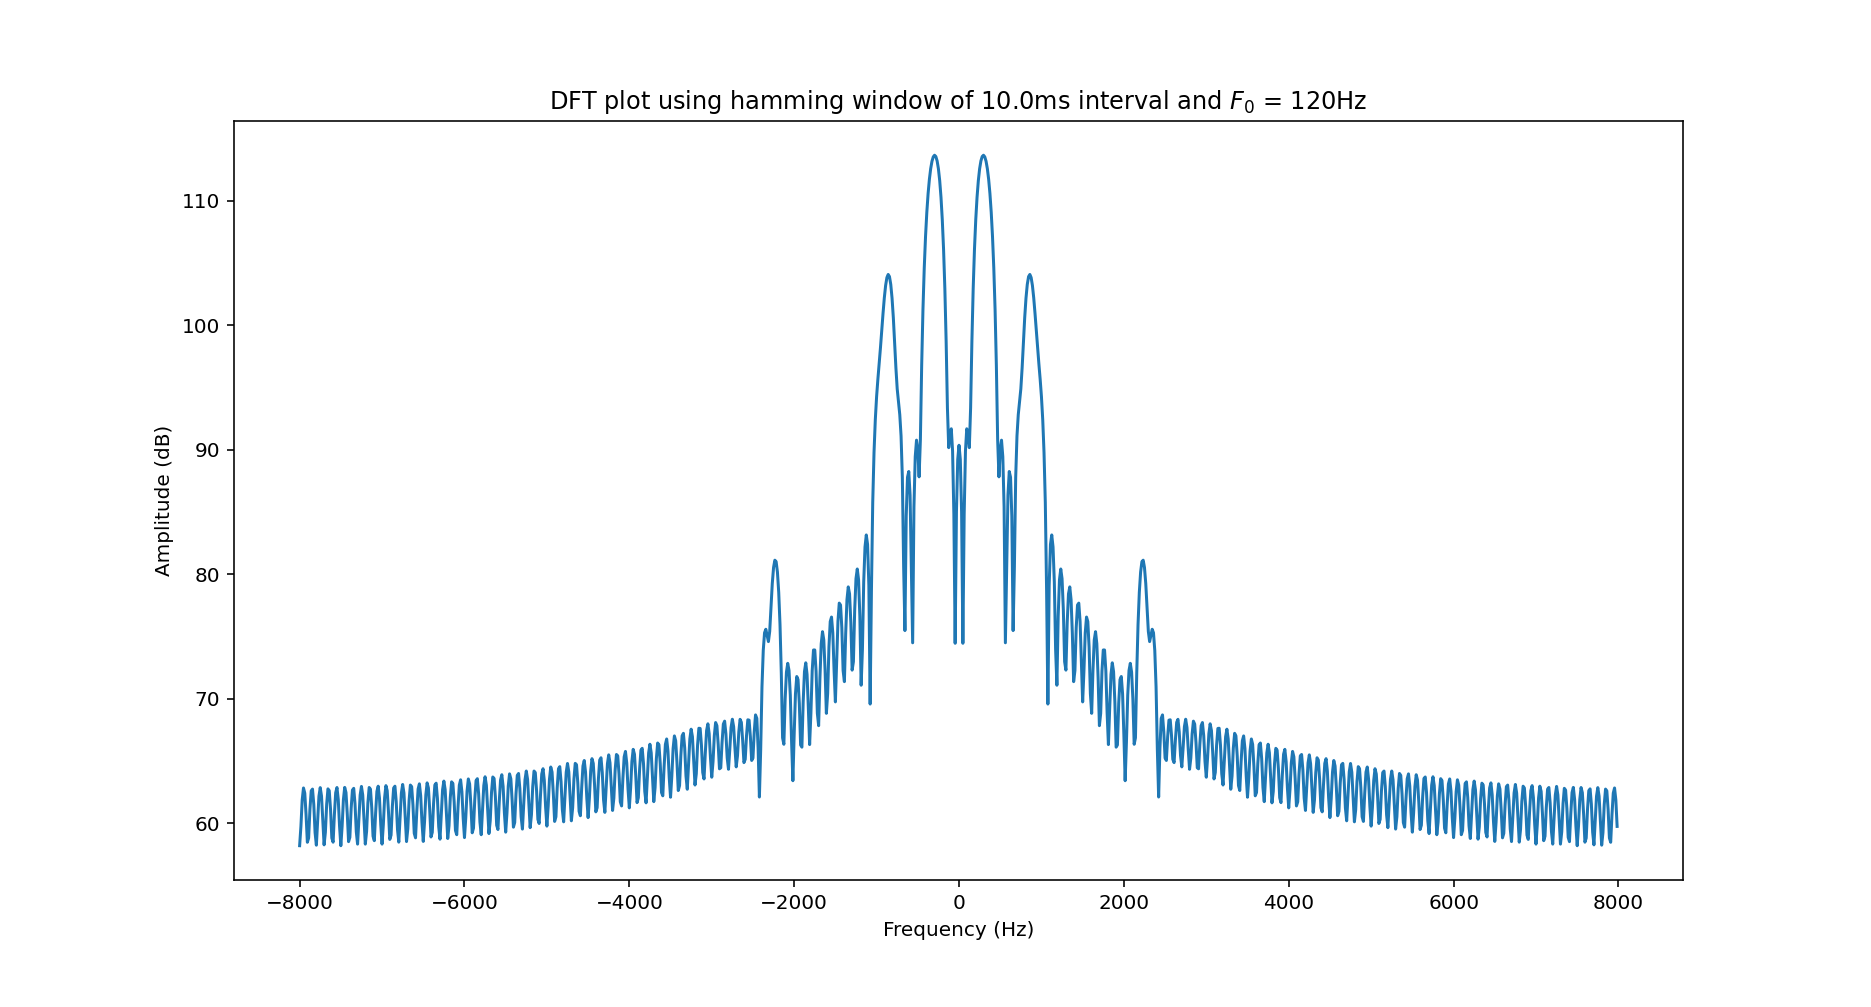

<IPython.core.display.Javascript object>


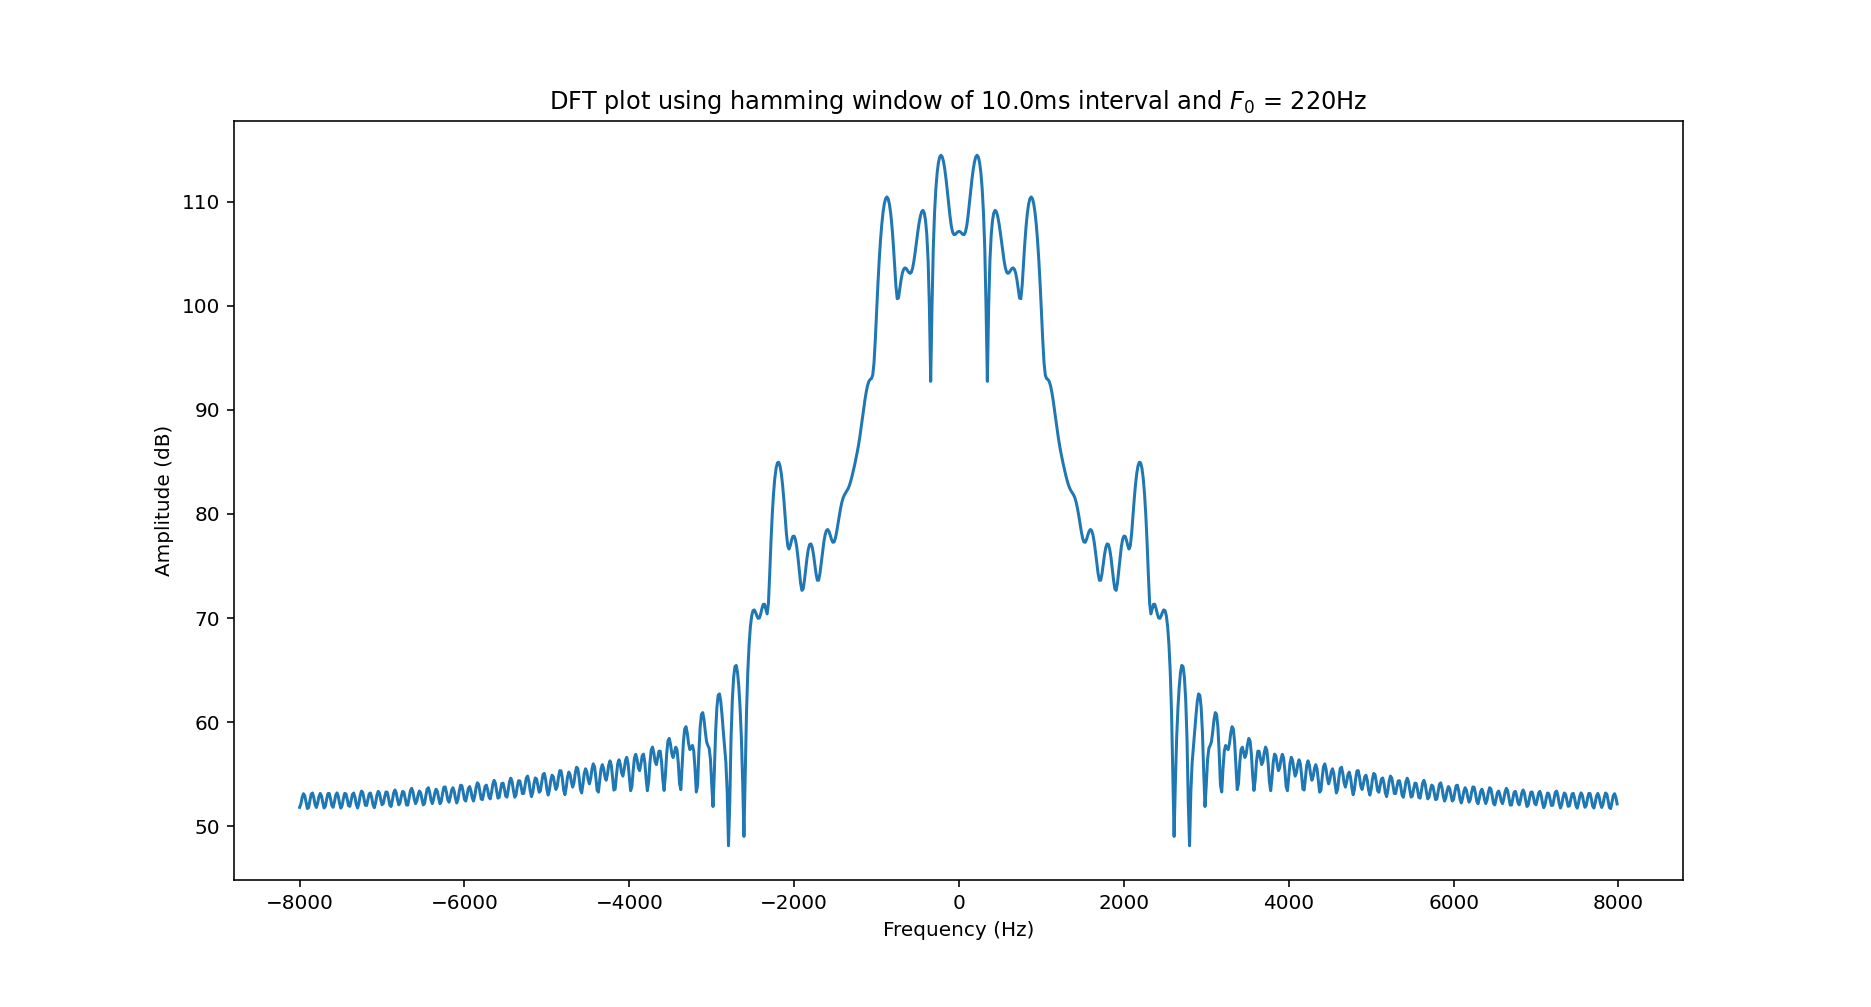

<IPython.core.display.Javascript object>


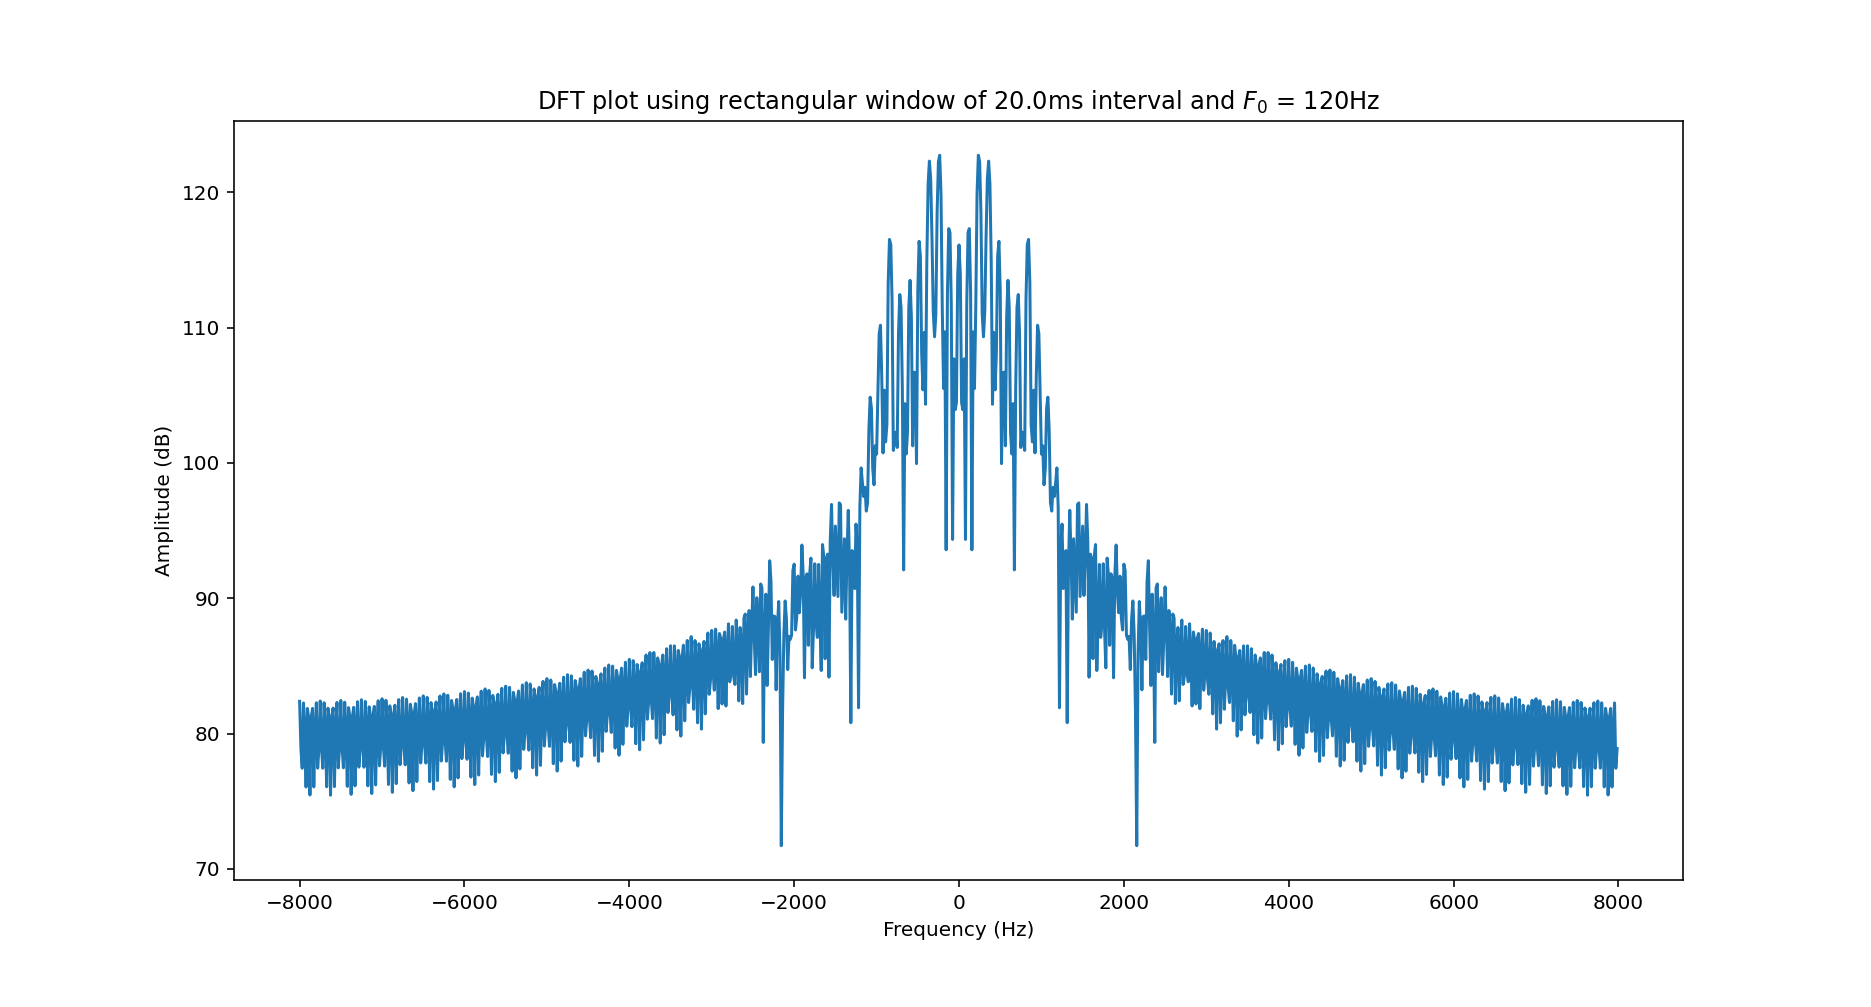

<IPython.core.display.Javascript object>


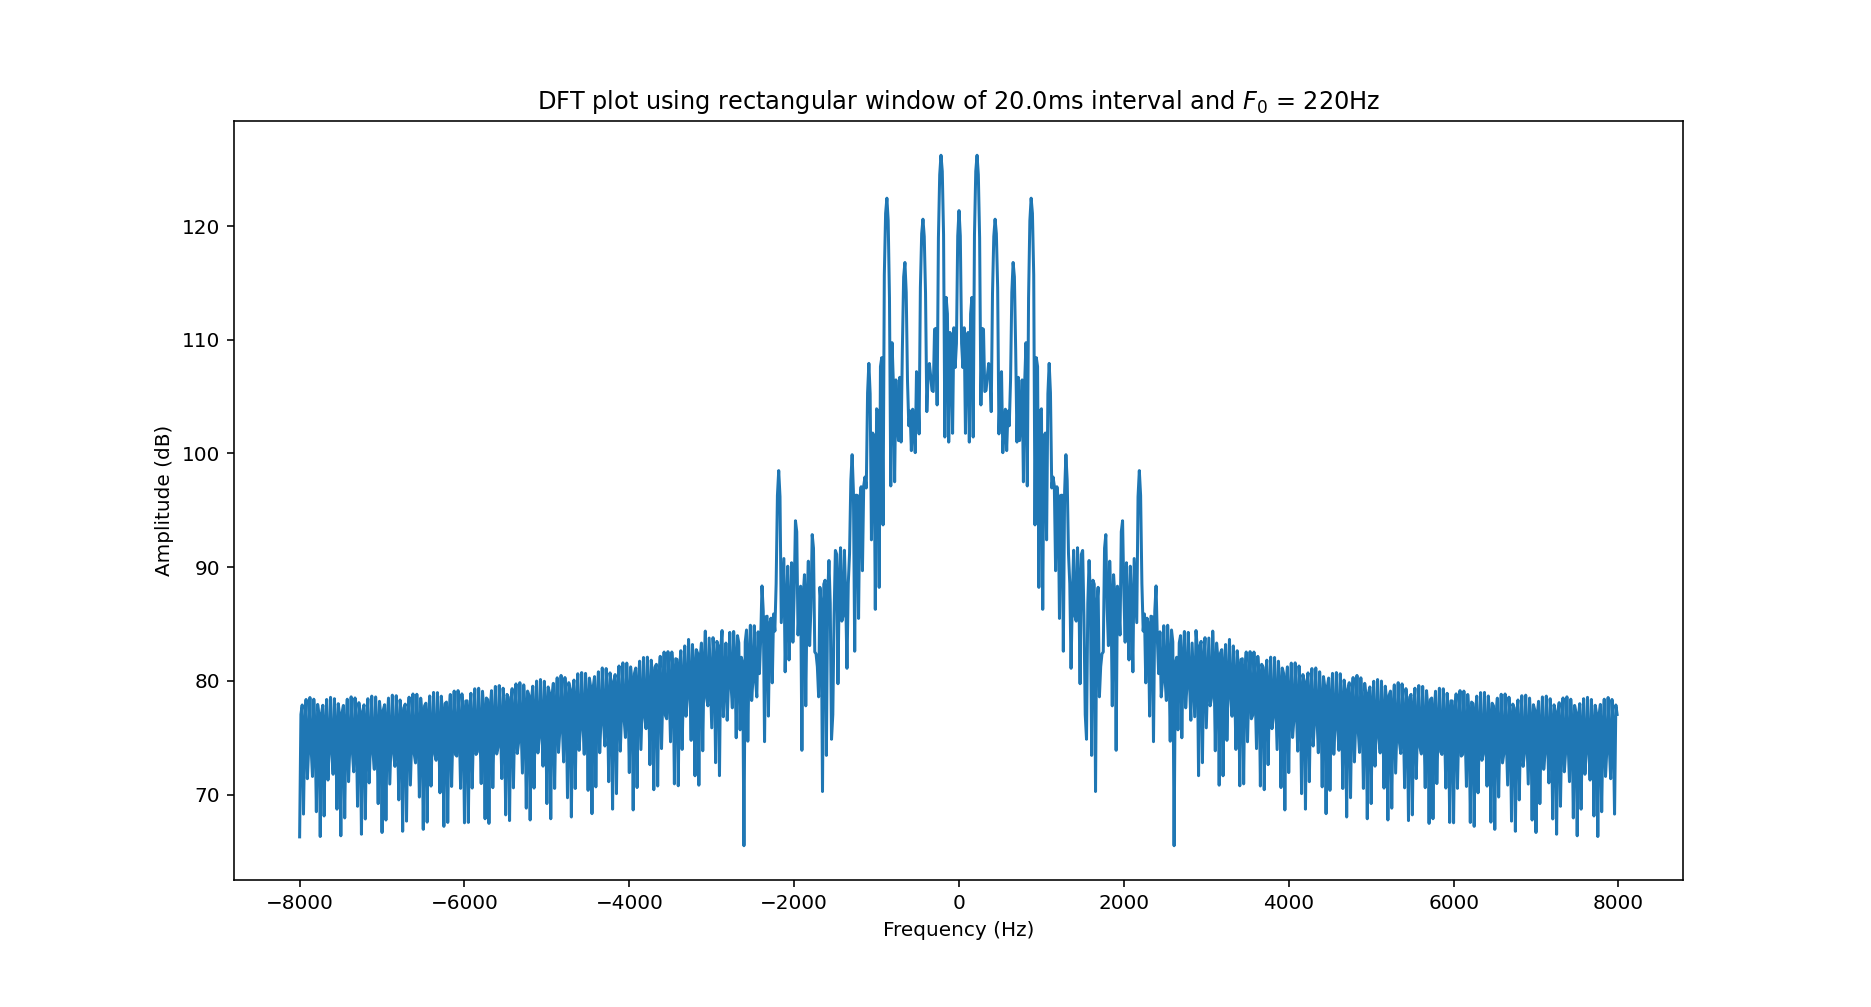

<IPython.core.display.Javascript object>


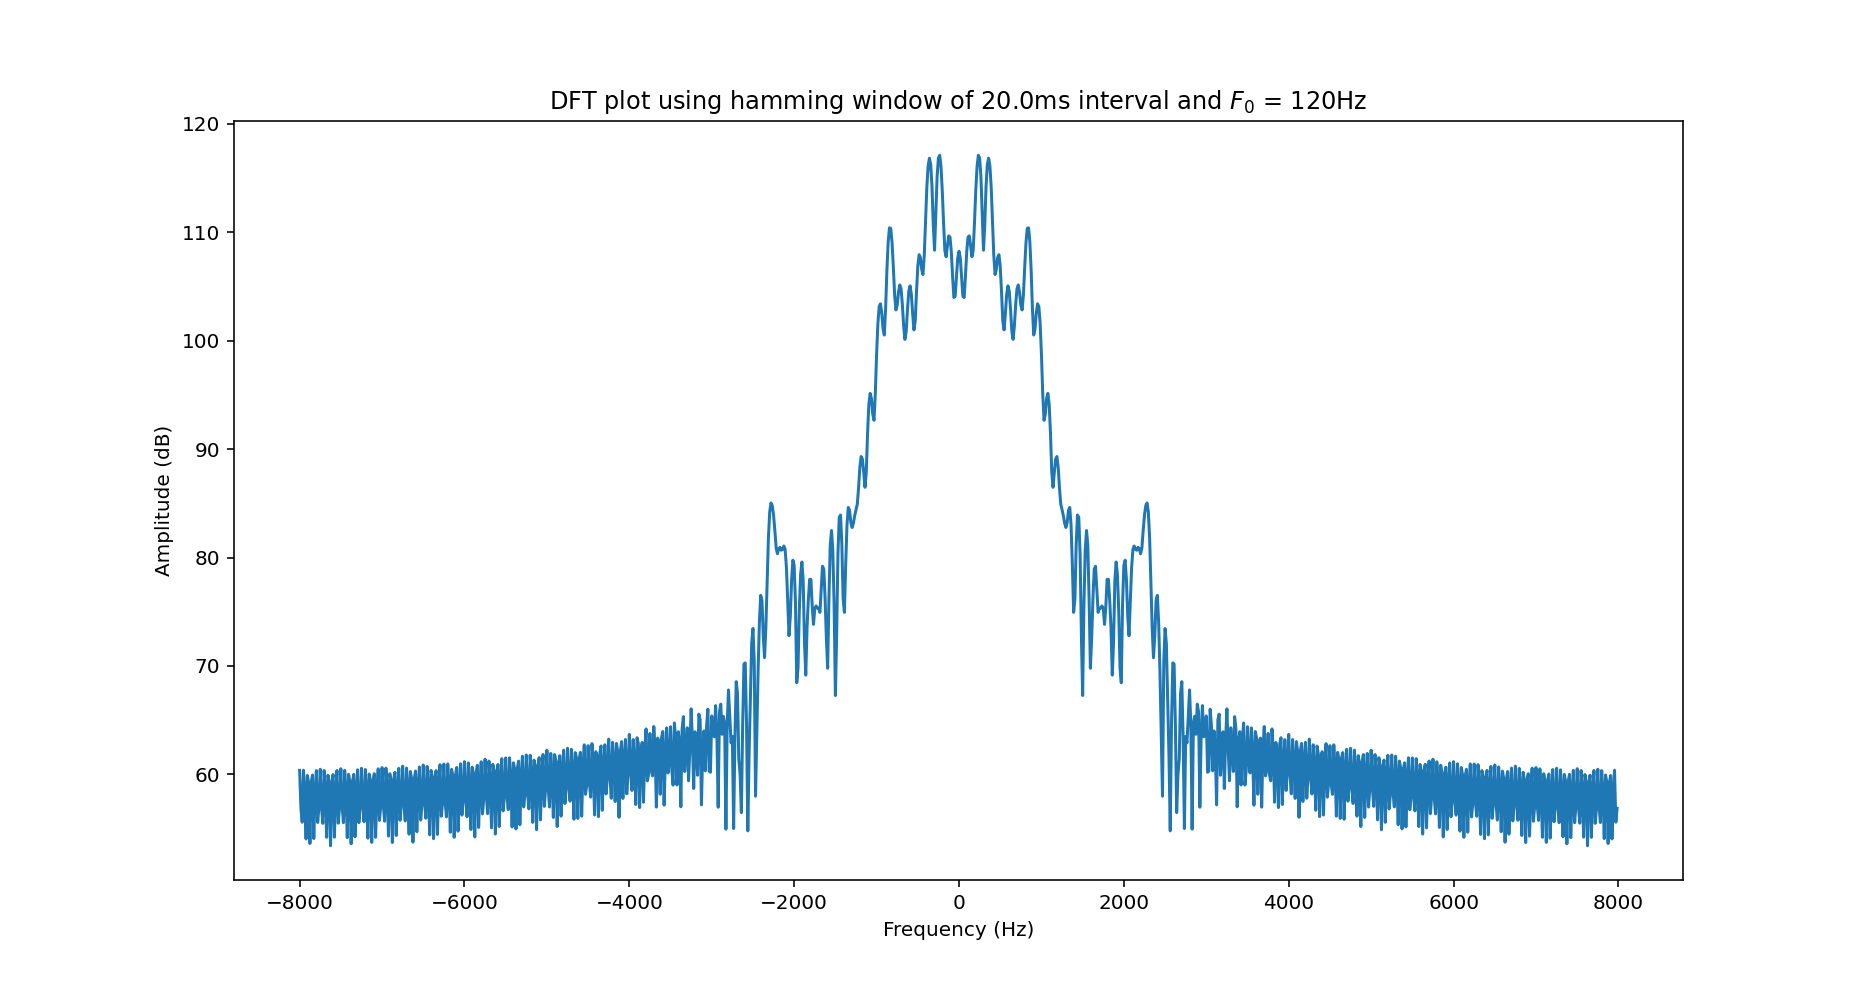

<IPython.core.display.Javascript object>


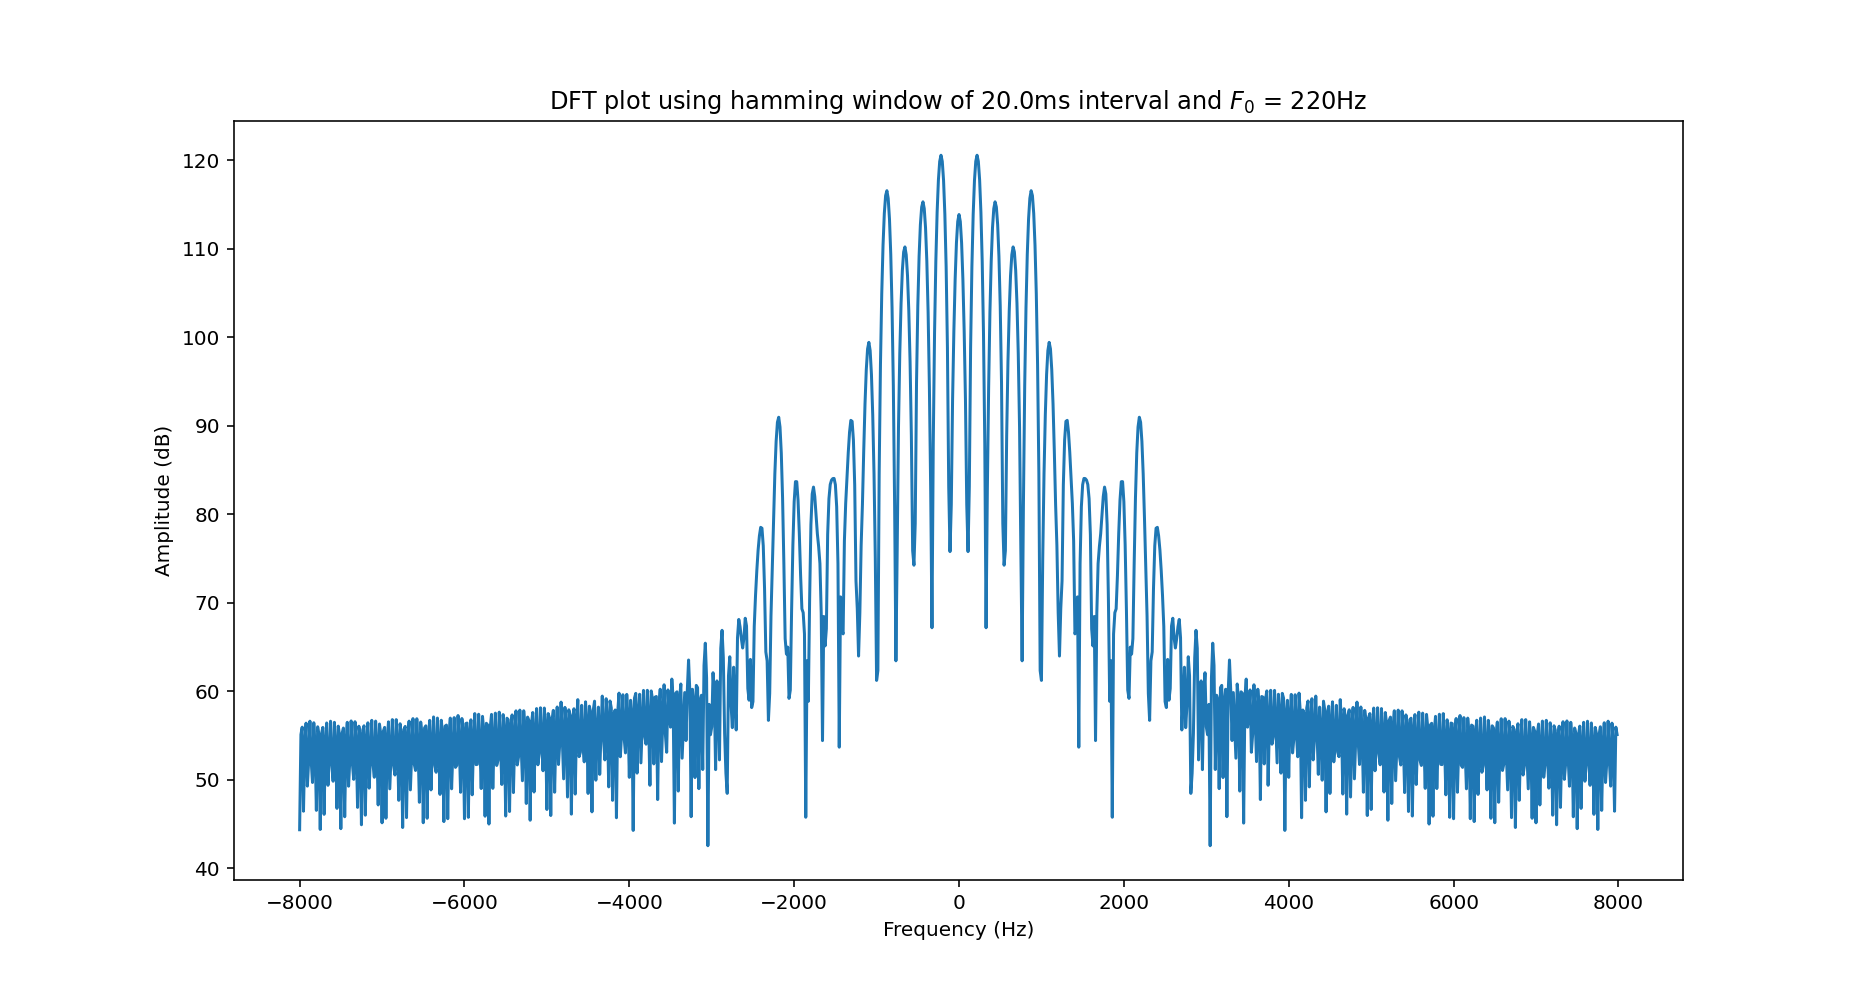

<IPython.core.display.Javascript object>


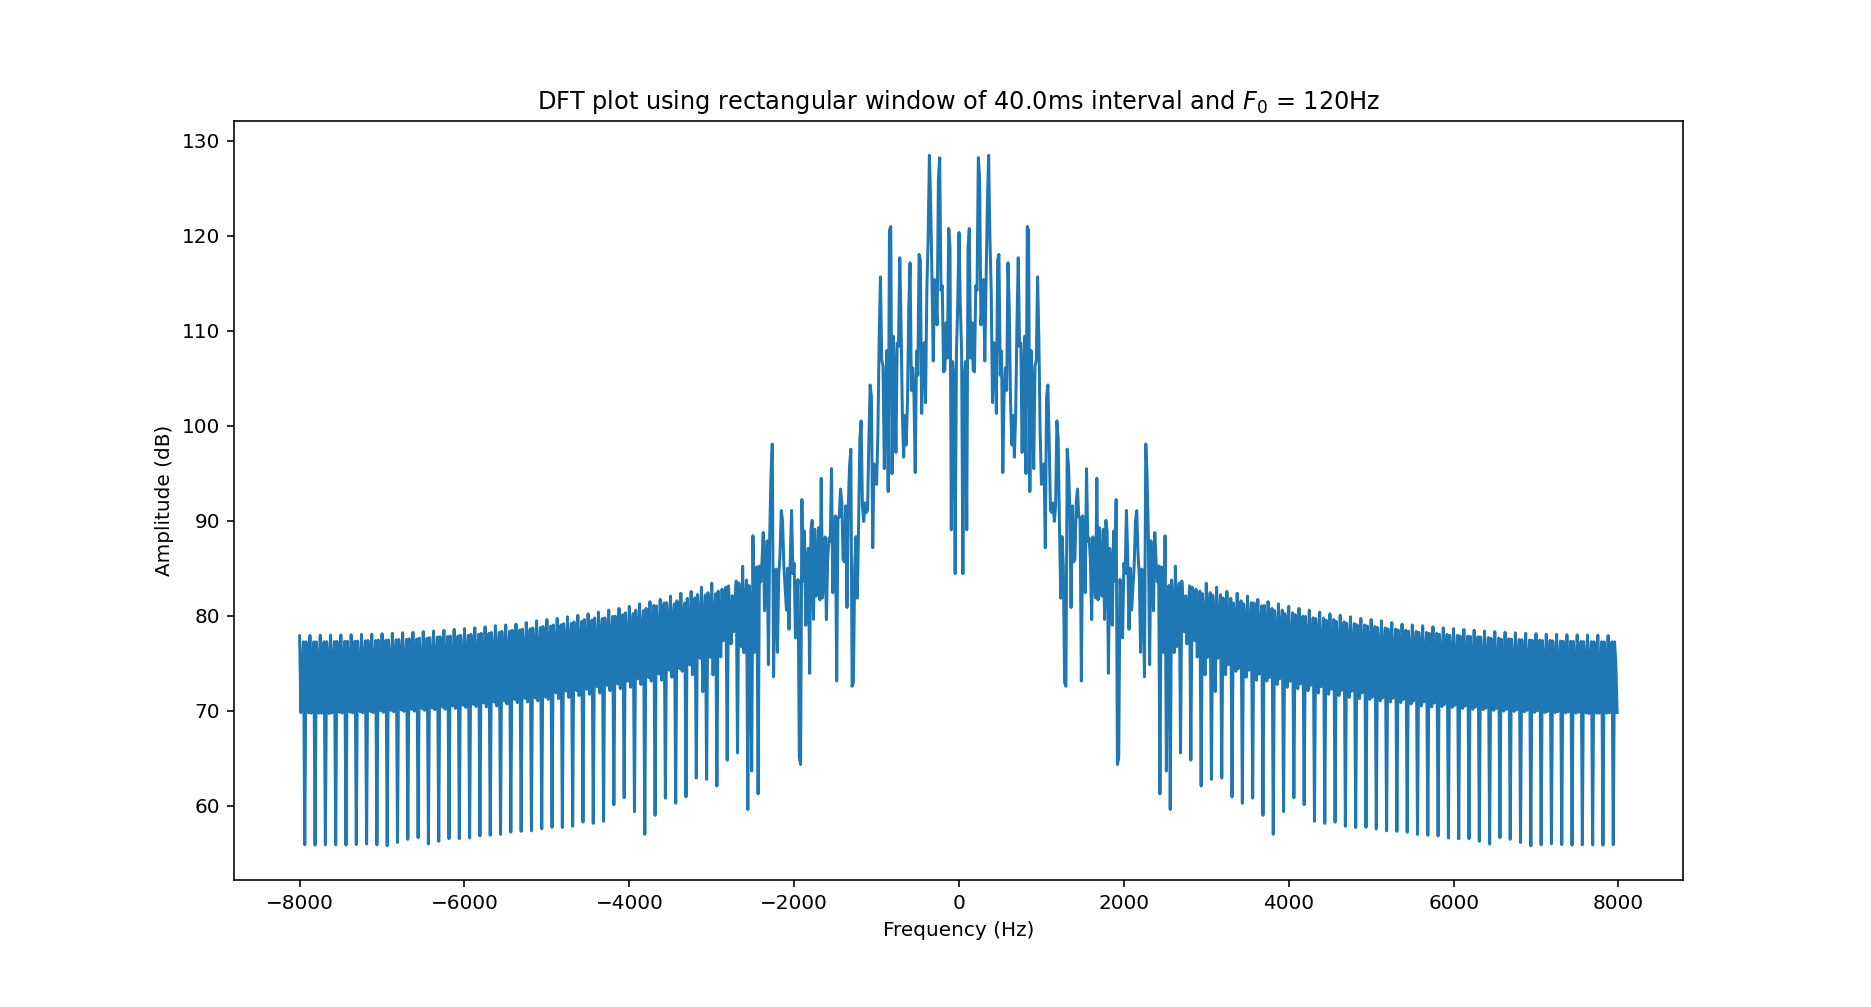

<IPython.core.display.Javascript object>


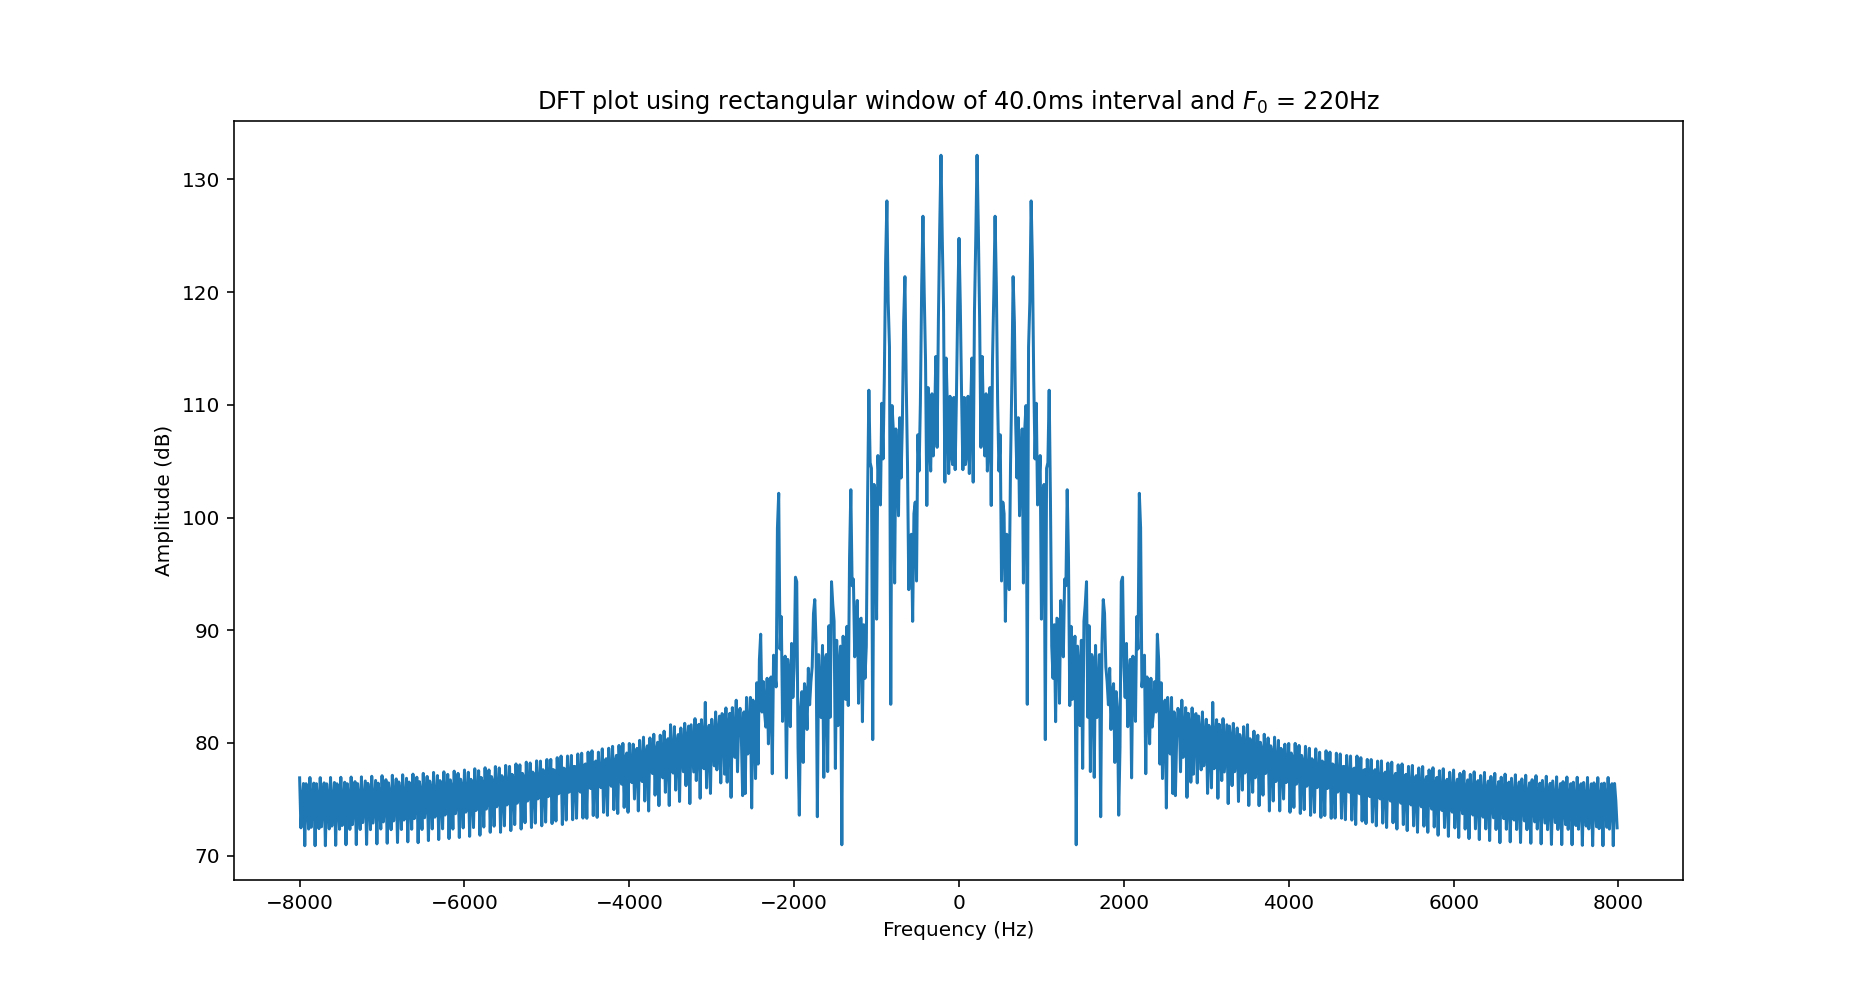

<IPython.core.display.Javascript object>


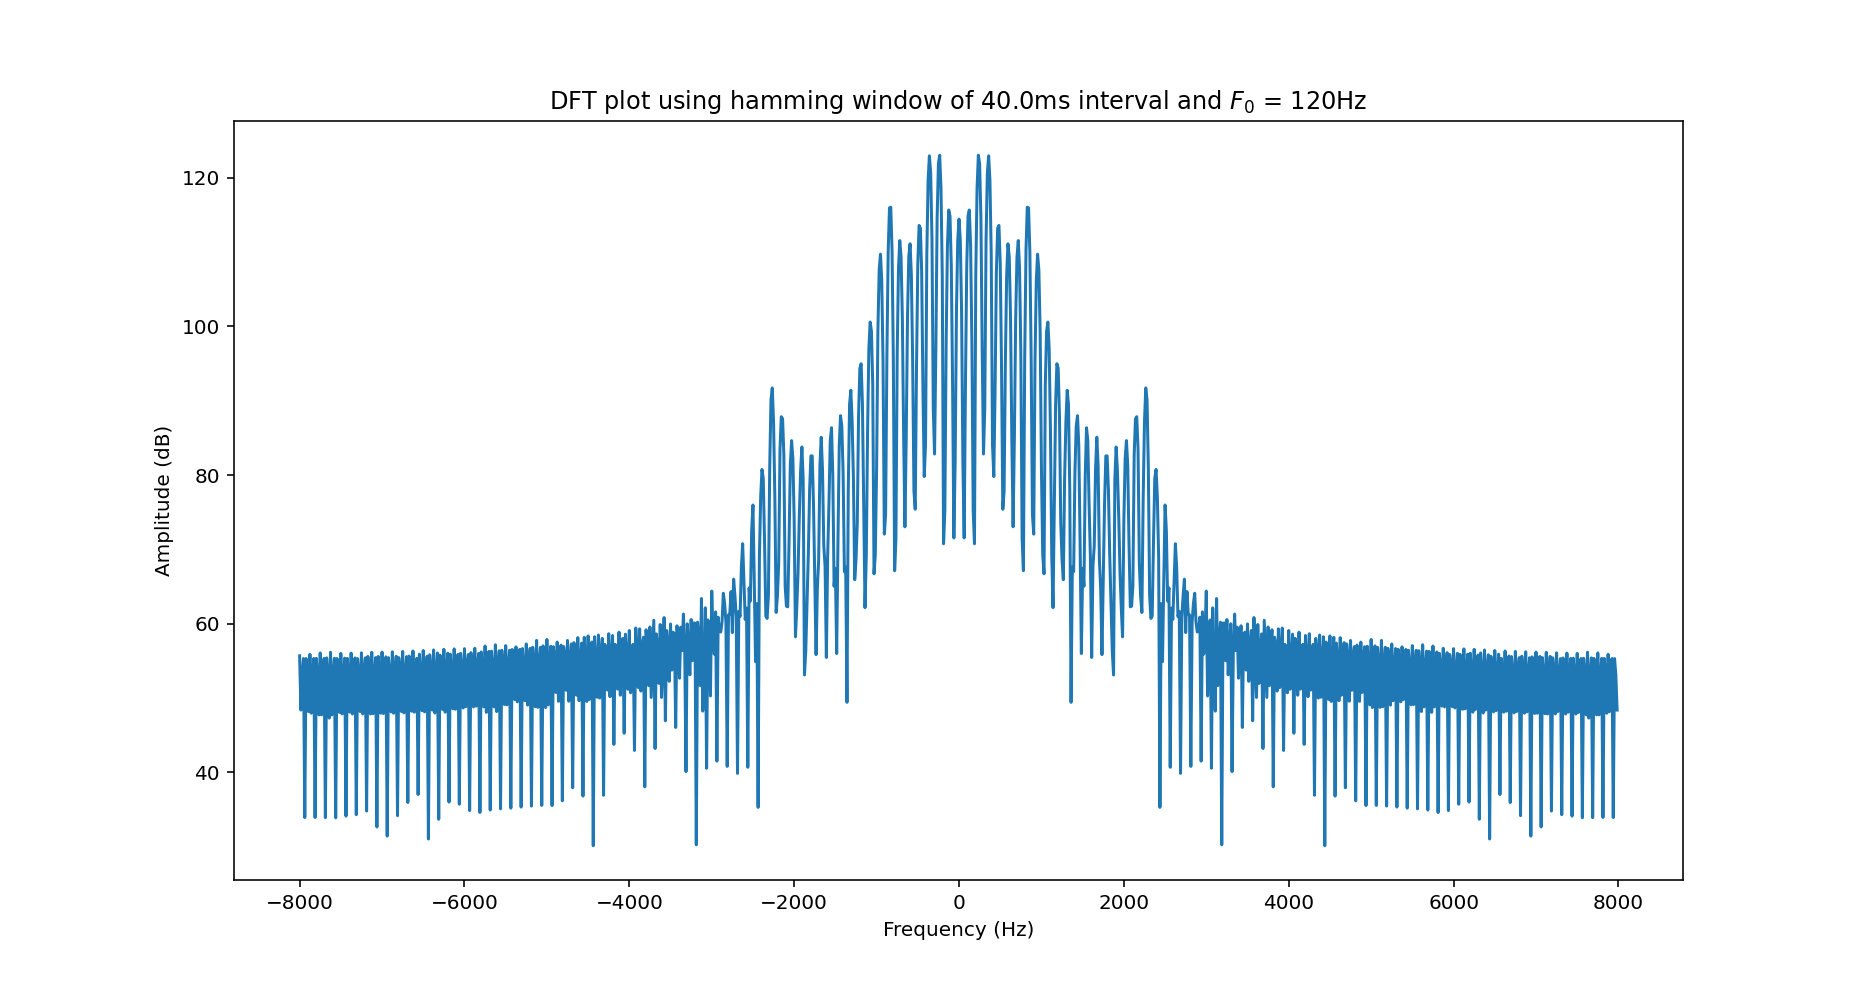

<IPython.core.display.Javascript object>


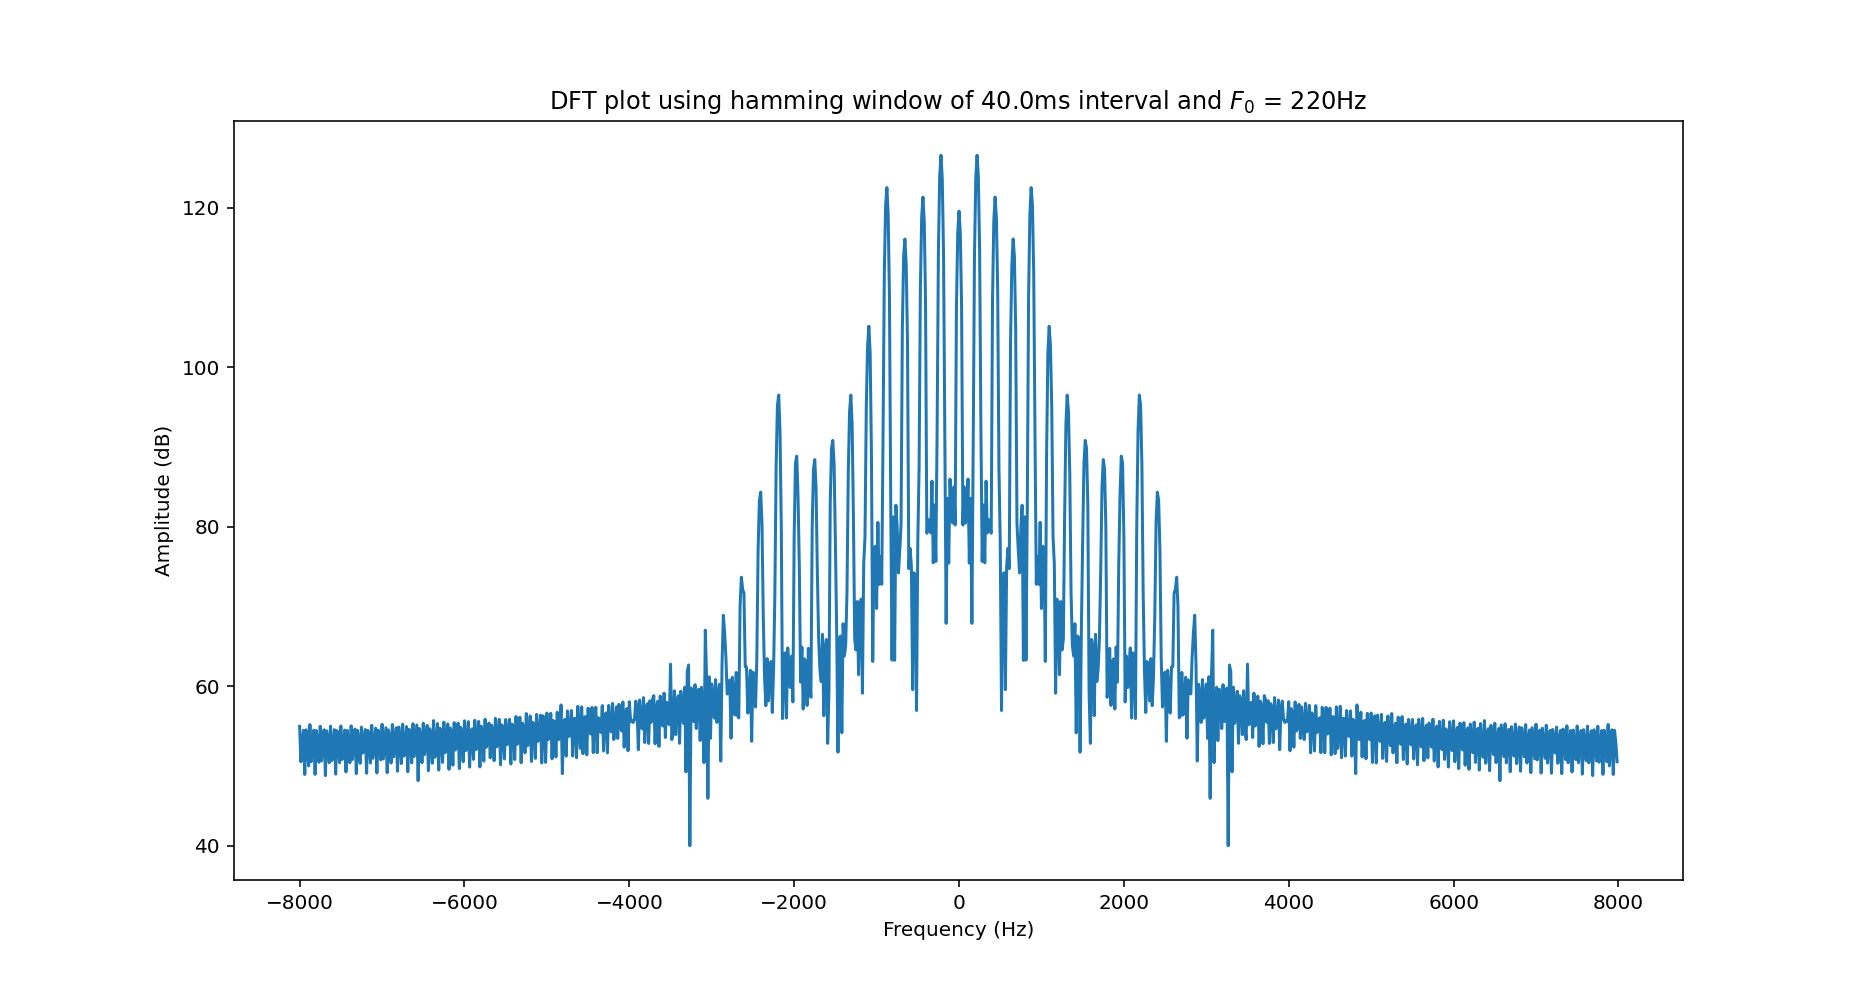

In [6]:
win_len = [5/1000, 10/1000, 20/1000, 40/1000]
for l in win_len:
  for w_shape in ['rectangular', 'hamming']:
    DFT(u120, 120, l, window_type=w_shape)
    DFT(u220, 220, l, window_type=w_shape)

## Estimated values of the signal paramters from $F_0 = 120Hz$ plots 

Ground Truth values: $F_1$=300Hz, $F_2$=870Hz, $F_3$=2240Hz

|   Hamming Window  ||            |             |             |         |         |       |      |      |
|-------------------|-|------------|-------------|-------------|---------|--------|------|------|------|
| Window Length(ms) | $F_0$(Hz)|$F_1$(Hz)  | $F_2$(Hz)   | $F_3$(Hz)   |   $F_0$ error|$F_1$ error|$F_2$ error|$F_3$ error|
| 5                 |  200    |290     |      840      |      2258     | 80    |10    |30    |18    |
| 10                |  130    |293     |      855      |      2227      | 10    |7    |15    |13    |
| 20                |  130    |236     |      833      |      2277     |  10    |64    |37    |37    |
| 40                |  125    |230     |      835      |      2265      | 5    |70    |35    |25    |


<br>

|   Rectangular Window  ||            |             |             |         |         |       |      |      |
|-------------------|-|------------|-------------|-------------|---------|--------|------|------|------|
| Window Length(ms) | $F_0$(Hz)|$F_1$(Hz)  | $F_2$(Hz)   | $F_3$(Hz)   |   $F_0$ error|$F_1$ error|$F_2$ error|$F_3$ error|
| 5                 |  210    |285   |      861     |      2279      | 90    |15    |9    |39    |
| 10                |  107    |260     |    845      |      2233      | 13    |40    |25    |7    |
| 20                |  99    |236    |      843      |      2296     |  21    |64    |27    |56    |
| 40                |  124    |232     |      829      |      2205      | 4    |68    |41    |35    |



<br>

## Estimated values of the signal paramters from $F_0 = 220Hz$ plots 

Ground Truth values: $F_1$=300Hz, $F_2$=870Hz, $F_3$=2240Hz

|   Hamming Window  ||            |             |             |         |         |       |      |      |
|-------------------|-|------------|-------------|-------------|---------|--------|------|------|------|
| Window Length(ms) | $F_0$(Hz)|$F_1$(Hz)  | $F_2$(Hz)   | $F_3$(Hz)   |   $F_0$ error|$F_1$ error|$F_2$ error|$F_3$ error|
| 5                 |  199    |293    |      862     |      2202     | 21    |7    |8    |38   |
| 10                |  202    |217     |     874      |     2190      | 18    |83    |4    |50    |
| 20                |  209    |217     |     870      |      2188     |  11    |83    |0    |52    |
| 40                |  219    |218     |     873      |      2186      | 1    |82    |3    |54    |


<br>


|   Rectangular Window  ||            |             |             |         |         |       |      |      |
|-------------------|-|------------|-------------|-------------|---------|--------|------|------|------|
| Window Length(ms) | $F_0$(Hz)|$F_1$(Hz)  | $F_2$(Hz)   | $F_3$(Hz)   |   $F_0$ error|$F_1$ error|$F_2$ error|$F_3$ error|
| 5                 |  203    |262    |       869     |      2111      | 17    |38    |1    |129    |
| 10                |  196    |230     |      874      |      2200      | 24    |70    |4    |40    |
| 20                |  210    |220     |      872      |      2185     |  10    |80    |2    |55    |
| 40                |  222    |218     |      873      |      2184      | 2    |82    |3    |56    |



# Observations from plots:

- The magnitude spectra for small window sizes appear to have wide lobes(and widely spaced peaks) and the spectra for small window lengths have narraw lobes(and narrow spaced peaks).
- The formants are easy to identify in the spectra of windows with small length
- The peaks near the formant freq peaks in the rectangular window appear to be closer in magnitude as compared to that in hamming window. It makes it easier to distinguish the formants frequency peaks in mangnitude spectra
- For window lengths of 5ms and 10ms, it is wideband analysis while for window lengths of 20ms to 30ms, it is narrowband analysis
- For larger F0, we can see the density of peaks incrasing. The spacing between peaks increases. It becomes diffult to distinguish formant peaks in narrowband anaysis.

# Observations from tables:
- The error for estimating F0 decreases on increasing window length
- The error in estimating formant frequency F1 increases on increasing window length in general with a few outliers. The same is expected for F2 and F3 frequencies i.e. in general it should increase on increasing window length but there are outliers. (The reason is not able to accurately measure the freq. They are measures via inspection from plots.)